In [0]:
import pandas as pd

In [0]:
dataset = pd.read_csv("/content/DCOILBRENTEU.csv")

In [84]:
dataset.head

<bound method NDFrame.head of             DATE DCOILBRENTEU
0     2015-01-06        50.12
1     2015-01-07        49.06
2     2015-01-08        49.43
3     2015-01-09        47.64
4     2015-01-12        46.90
...          ...          ...
1300  2019-12-31        67.77
1301  2020-01-01            .
1302  2020-01-02        67.05
1303  2020-01-03        69.08
1304  2020-01-06        70.25

[1305 rows x 2 columns]>

In [85]:
dataset.columns

Index(['DATE', 'DCOILBRENTEU'], dtype='object')

In [86]:
from datetime import date, datetime, timedelta

dataset['DaysBack'] = (pd.to_datetime(dataset['DATE']) - datetime.today()).dt.days
dataset['DaysBack'] = pd.to_numeric(dataset['DaysBack'],errors='coerce')
dataset['price'] = pd.to_numeric(dataset['DCOILBRENTEU'],errors='coerce')
dataset = dataset.dropna()
dataset['price'] = dataset['price'].astype('int64')
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,DATE,DCOILBRENTEU,DaysBack,price
0,2015-01-06,50.12,-1837,50
1,2015-01-07,49.06,-1836,49
2,2015-01-08,49.43,-1835,49
3,2015-01-09,47.64,-1834,47
4,2015-01-12,46.90,-1831,46


In [87]:
dataset.dtypes

DATE            object
DCOILBRENTEU    object
DaysBack         int64
price            int64
dtype: object

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1304
Data columns (total 4 columns):
DATE            1275 non-null object
DCOILBRENTEU    1275 non-null object
DaysBack        1275 non-null int64
price           1275 non-null int64
dtypes: int64(2), object(2)
memory usage: 49.8+ KB


In [0]:
input_x = dataset['DaysBack'].values.reshape(-1,1)
output_y = dataset['price'].values


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.30)

In [11]:
print(type(x_train))
#print(y_train[:5])

<class 'numpy.ndarray'>


In [0]:
import matplotlib.pyplot as plt


def plot_graphs(x, y):
  plt.plot(x,y,'.')
  plt.xlabel("Days back")
  plt.ylabel("price")
  plt.show()

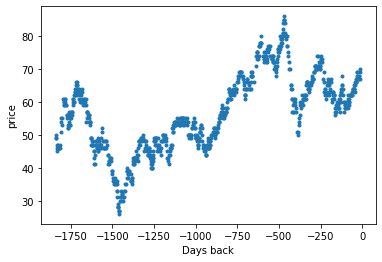

In [13]:
plot_graphs(x_train,y_train)

#Model 1 - Polynomial regression

In [0]:
def plot_legend(x,y,p):
  plt.plot(x,y,'.')
  plt.plot(x,p,'.')
  plt.xlabel("Days Back")
  plt.ylabel("Price")
  plt.legend(["y","p"])
  plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [49]:
type(x_test)

numpy.ndarray

In [71]:
np.shape(x_test)

(383, 1)

In [0]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree,prediction_data):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  #print(y_train_predicted)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)

  
  print("Test data: " + prediction_data + "\nOutput:")
  print(poly_model.predict(poly_features.fit_transform([[prediction_data]])))

  plot_legend(x_train,y_train, y_train_predicted)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

  plot_legend(x_test,y_test, y_test_predict)



Test data: -120
Output:
[62.1848987]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:1508: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  n_samples, n_features = check_array(X, accept_sparse=True).shape


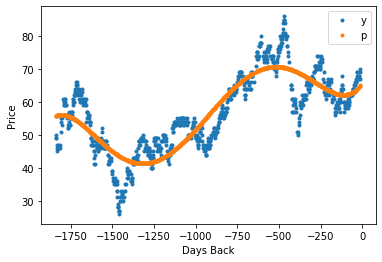

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.889926152374655
R2 score of training set is 0.7381551547462486


The model performance for the test set
-------------------------------------------
RMSE of test set is 5.855892594303667
R2 score of test set is 0.7494705140741471


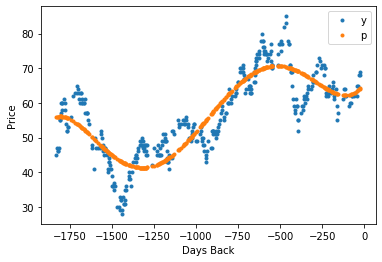

In [76]:
create_polynomial_regression_model(5,'-120')

#Model 2 - XGBoost

In [0]:
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor()
#model.fit(x_train,y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [63]:
model.fit(x_train,y_train,verbose = True)

[11:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xg_predict = model.predict(x_test)

In [69]:
type(xg_predict)

numpy.ndarray

In [70]:
np.shape(xg_predict)

(383,)

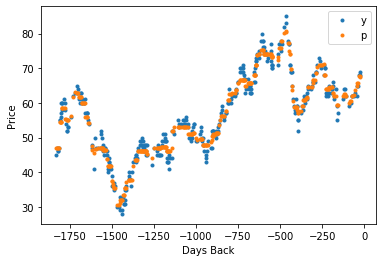

In [73]:
plot_legend(x_test,y_test, xg_predict)

In [66]:
model.predict(-150)

array([59.445045], dtype=float32)